## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [17]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

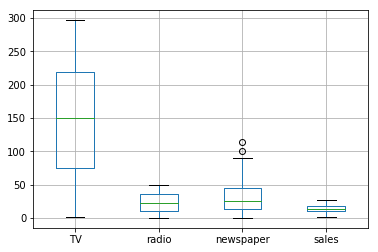

In [19]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

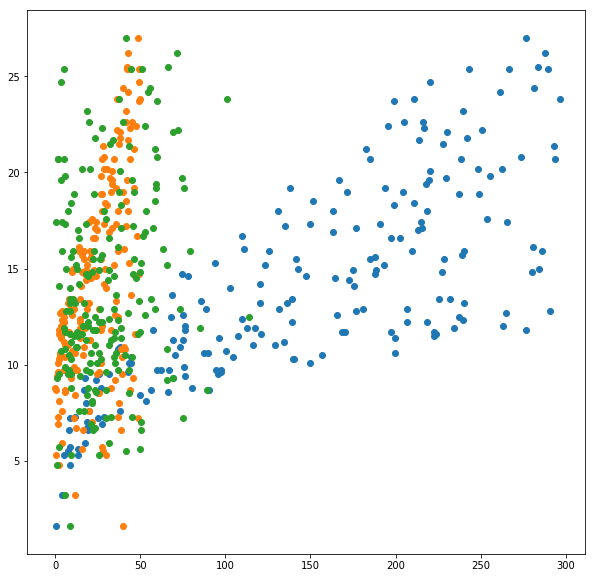

In [20]:
#plt.scatter(Fill_this_in)
import numpy as NP
A = df['TV']
B = df['radio']
C = df['newspaper']
Y = df['sales']

plt.figure(figsize=(10,10))
plt.scatter(A,Y)
plt.scatter(B,Y)
plt.scatter(C,Y)

plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


Explanation: TV and Radio seem to postively correlate with Sales


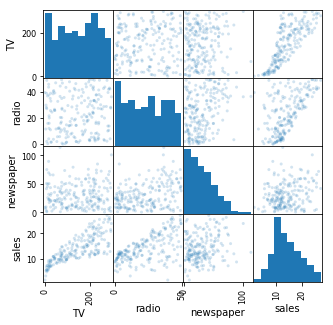

In [21]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,figsize = [5,5], alpha=0.2, diagonal='hist')

print "Explanation: TV and Radio seem to postively correlate with Sales"



Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [22]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [23]:
y = df['sales']

b) Set X to be just the features described above in df

In [24]:
X = df.drop(['sales'],axis=1) 


c) Randomly split data into training and testing - 80% training, 20% testing.

In [25]:
size = float(len(X))
  # Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
  # Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [36]:
  # Create linear regression object
regr = LinearRegression()

  # Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [27]:

print('R^2: %.2f' % regr.score(X_test, y_test))

print 'Coefficient of determination of 0.9 shows a strong relationship between model predicted values and experimental data'


R^2: 0.90
Coefficient of determination of 0.9 shows a strong relationship between model predicted values and experimental data


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

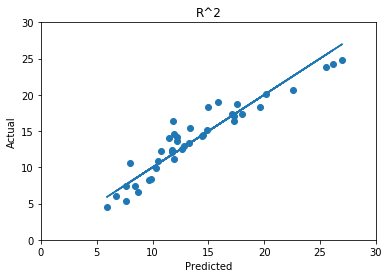

The scatter plot seems to be mostly linear with non-linear increase at higher values


In [28]:
#f) make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Testing Data')
plt.title('R^2')
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test)
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()
print 'The scatter plot seems to be mostly linear with non-linear increase at higher values'

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

('Coefficients:', array([ 4.04663787,  2.66458107, -0.02050924]))


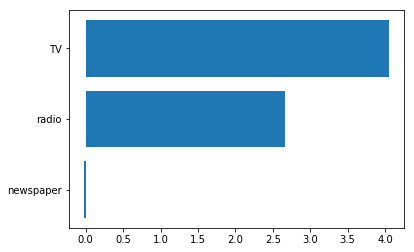

after features standardization, TV is the most important feature


In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X2 =scaler.transform(X)

size = float(len(X2))
X2_train = X2[0:int(size*0.8)]
X2_test = X2[int(size*0.8):]

# Split the targets into training/testing sets
y2_train = y[0:int(size*0.8)]
y2_test = y[int(size*0.8):]

# Create linear regression object
regrN = LinearRegression()

# Train the model using the training sets
regrN.fit(X2_train, y2_train)

# Feature coefficients
print('Coefficients:', regrN.coef_)

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['TV', 'radio', 'newspaper']
f_importances(regrN.coef_, features_names)

print "after features standardization, TV is the most important feature" 

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


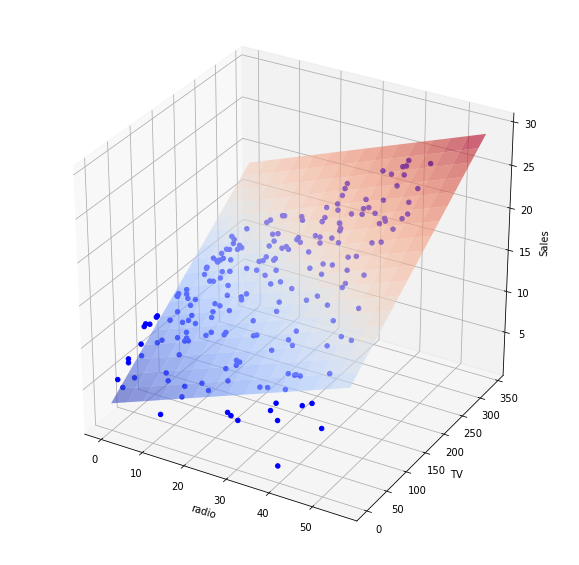

In [46]:
#BONUS

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

x_surf = np.arange(0, 60, 4)
y_surf = np.arange(0, 350, 20) 
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'radio': x_surf.ravel(), 'TV': y_surf.ravel()})
out = fit.predict(exog = exog)

#plots surface
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.6,cmap=cm.coolwarm)

# Creates scatter plot
ax.scatter(df['radio'], df['TV'], df['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')

plt.show()


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643
when decreasing the learning_rate - slowly converging, when increasing the learning_rate - diverging, when balanced learning_rate good. 
learning rate depends on the initial guesses for b and m and the total number of iterations run


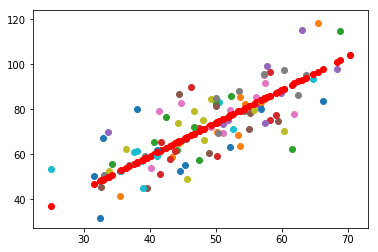

In [33]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("/Users/Main/Documents/GitHub/APMAE4990-JCP2203/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}" .format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

print "when decreasing the learning_rate - slowly converging, when increasing the learning_rate - diverging, when balanced learning_rate good. "
print "learning rate depends on the initial guesses for b and m and the total number of iterations run"

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


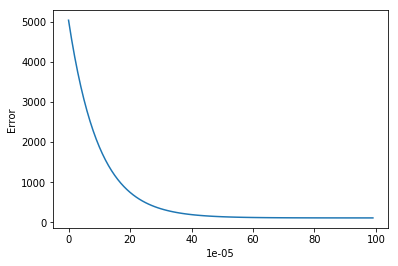

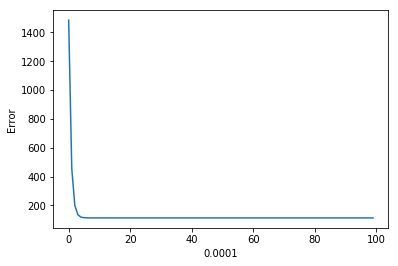

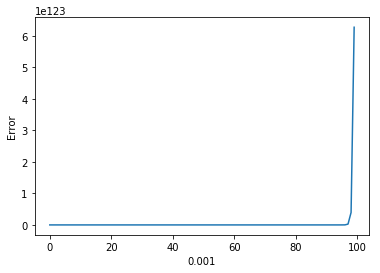

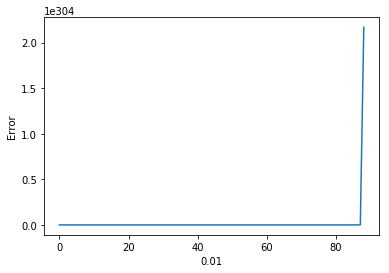

In [34]:

#use linear eqn y=mx+b
learning_rates = [1E-5, 1E-4, 1E-3, 1E-2]

for i in learning_rates:
    errors =[]
    for j in range(1, 101):
        points = genfromtxt("/Users/Main/Documents/GitHub/APMAE4990-JCP2203/data/data.csv", delimiter=",")
        learning_rate = i
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        num_iterations = j

        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        errors.append(compute_error_for_line_given_points(b,m,points))

    plt.figure()
    plt.xlabel(i)
    plt.ylabel('Error')
    plt.plot(errors)
    
